<h1>**ReadMe**</h1>

An important part in the profitability of a credit card product is the issuer's ability to detect and deny fraud. Purchase fraud can cost as much as 0.10% of purchase volumes, which must be paid for by the issuer. To help prevent fraud is to reduce the cost of purchase fraud to the issuer, so many issuers will spend tremendous analysis resources on detecting and denying fraudulent transactions.

Available in Kaggle is a dataset of purchase transactions with several attributes, including a flag for Fraud. Read more about the dataset [here.](https://www.kaggle.com/dalpozz/creditcardfraud)

--------------------------------------------------------------------------------------------------------------------------------
&nbsp;&nbsp;

We'll start by importing the necessary packages and the dataset.

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
transactions = pd.read_csv('creditcard.csv')

<h2>**Data Exploration**</h2>


Alright, now that we have our transcations loaded, let's take a look at the data.

In [3]:
transactions.head(n=10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looks like the data is all transformed and renamed, probably to anonymize the fields. This will make our work much less interpretible. Oh well, onward!

In [5]:
transactions.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Awesome, no missing values. Wish real life was this clean.

Let's see how Amount varies by Fraud / Not Fraud

In [6]:
print('Fraud')
print(transactions.Amount[transactions.Class==1].describe())
print()
print('Not Fraud')
print(transactions.Amount[transactions.Class==0].describe())
print()

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Not Fraud
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64



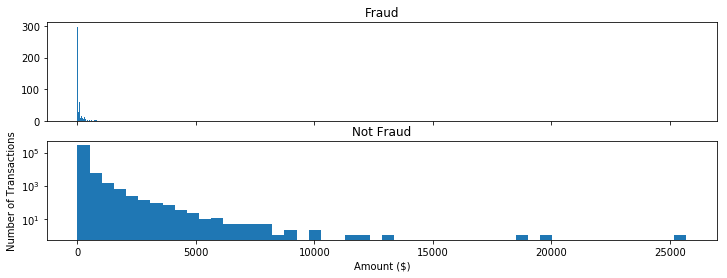

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(transactions.Amount[transactions.Class == 1], bins=bins)
ax1.set_title('Fraud')
ax2.hist(transactions.Amount[transactions.Class == 0], bins=bins)
ax2.set_title('Not Fraud')


plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Fraudulent transactions are larger, on average, than non fraudulent transactions, despit the much longer tail on non fraudulent transactions.

Okay, next let's see how cyclical fraudulent and non fraudulent transactions are, respecitively.

In [8]:
print('Fraud')
print(transactions.Time[transactions.Class==1].describe())
print()
print('Not Fraud')
print(transactions.Time[transactions.Class==0].describe())
print()

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64



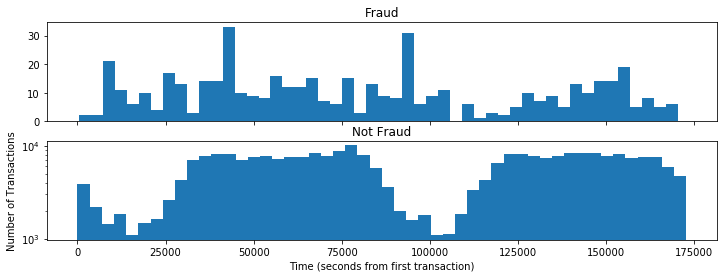

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(transactions.Time[transactions.Class == 1], bins=bins)
ax1.set_title('Fraud')
ax2.hist(transactions.Time[transactions.Class == 0], bins=bins)
ax2.set_title('Not Fraud')


plt.xlabel('Time (seconds from first transaction)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Fraud is less cyclical than not fraud. Legitimate transaction volume decreases dramatically twice, presumably at night. This may come in handy later.

Next let's consider both time and amount.

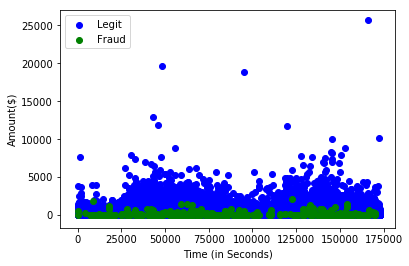

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(transactions.Time[transactions.Class == 0], transactions.Amount[transactions.Class == 0],\
           c = 'b',label='Legit')

ax1.scatter(transactions.Time[transactions.Class == 1], transactions.Amount[transactions.Class == 1],\
           c = 'g',label='Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount($)')
plt.legend(loc='upper left');
plt.show()


Yeah that wasn't very useful. Let's look now at the anonymized data.

C:\Users\SethMillerd\Anaconda3\envs\Kaggle_env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


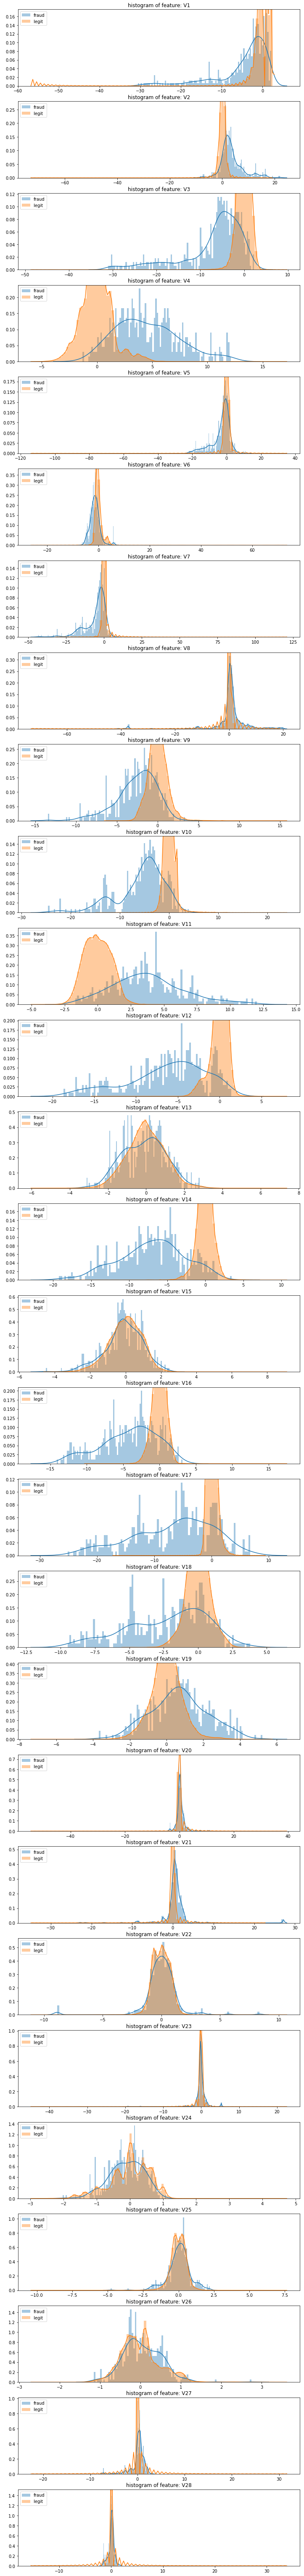

In [10]:
#Select only the anonymized features.
v_features = transactions.ix[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(transactions[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(transactions[cn][transactions.Class == 1], bins=100,label='fraud')
    sns.distplot(transactions[cn][transactions.Class == 0], bins=100,label='legit')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    ax.legend(loc='upper left');
plt.show()

Okay, I now have a good sense of which variables might be important in detecting fraud. Note that if the data were not anonymized and transformed, I would also use intuition in this step to choose which variables I expect to "pop".

Now that we analyzed the data, let's move on to building an actual model. Given that the independent variables are all non-null continuous variables and the outcome is binary, this is the perfect opportunity to use XGBoostClassifier.

In [22]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(transactions[v_features], transactions['Class'], 
                                                    test_size=test_size, random_state=seed)

In [23]:
#train model on train data

model = xgb.XGBClassifier()
model.fit(X_train,y_train)
print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [21]:
from sklearn.metrics import accuracy_score

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.96%


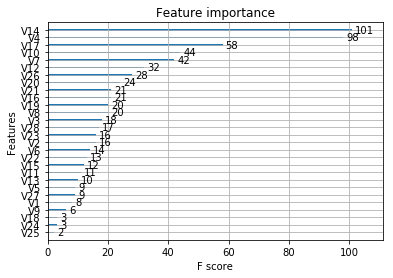

V1 0.0118343 
V2 0.0236686 
V3 0.0266272 
V4 0.14497 
V5 0.0133136 
V6 0.0207101 
V7 0.0621302 
V8 0.0295858 
V9 0.00887574 
V10 0.0650888 
V11 0.0162722 
V12 0.0473373 
V13 0.0147929 
V14 0.149408 
V15 0.0177515 
V16 0.0310651 
V17 0.0857988 
V18 0.00443787 
V19 0.0295858 
V20 0.035503 
V21 0.0310651 
V22 0.0192308 
V23 0.0236686 
V24 0.00443787 
V25 0.00295858 
V26 0.0414201 
V27 0.0133136 
V28 0.0251479 


In [38]:
xgb.plot_importance(model)
plt.show()

for row in range(len(model.feature_importances_)):
    print(v_features[row],model.feature_importances_[row],'')

In [50]:
def calc_lift(x,y,clf,bins=10):
    """
    Takes input arrays and trained SkLearn Classifier and returns a Pandas
    DataFrame with the average lift generated by the model in each bin

    Parameters
    -------------------
    x:    Numpy array or Pandas Dataframe with shape = [n_samples, n_features]

    y:    A 1-d Numpy array or Pandas Series with shape = [n_samples]
          IMPORTANT: Code is only configured for binary target variable
          of 1 for success and 0 for failure

    clf:  A trained SkLearn classifier object
    bins: Number of equal sized buckets to divide observations across
          Default value is 10
    """

    #Actual Value of y
    y_actual = y
    #Predicted Probability that y = 1
    y_prob = clf.predict_proba(x)
    #Predicted Value of Y
    y_pred = clf.predict(x)
    cols = ['ACTUAL','PROB_POSITIVE','PREDICTED']
    data = [y_actual,y_prob[:,1],y_pred]
    df = pd.DataFrame(dict(zip(cols,data)))
    
    #Observations where y=1
    total_positive_n = df['ACTUAL'].sum()
    #Total Observations
    total_n = df.index.size
    natural_positive_prob = total_positive_n/float(total_n)


    #Create Bins where First Bin has Observations with the
    #Highest Predicted Probability that y = 1
    df['BIN_POSITIVE'] = pd.qcut(df['PROB_POSITIVE'],bins,labels=False)
    
    pos_group_df = df.groupby('BIN_POSITIVE')
    #Percentage of Observations in each Bin where y = 1 
    lift_positive = pos_group_df['ACTUAL'].sum()/pos_group_df['ACTUAL'].count()
    lift_index_positive = (lift_positive/natural_positive_prob)*100
    
    
    #Consolidate Results into Output Dataframe
    lift_df = pd.DataFrame({'LIFT_POSITIVE':lift_positive,
                               'LIFT_POSITIVE_INDEX':lift_index_positive,
                               'BASELINE_POSITIVE':natural_positive_prob})
    
    return lift_df

In [52]:
lift = calc_lift(X_test,y_test,model,bins=10)

In [54]:
lift

,BASELINE_POSITIVE,LIFT_POSITIVE,LIFT_POSITIVE_INDEX
BIN_POSITIVE,,,
0,0.001766,0.000000,0.000000
1,0.001766,0.000000,0.000000
2,0.001766,0.000000,0.000000
3,0.001766,0.000000,0.000000
4,0.001766,0.000106,6.024545
5,0.001766,0.000000,0.000000
6,0.001766,0.000000,0.000000
7,0.001766,0.000106,6.020061
8,0.001766,0.000639,36.170363
